<h3> A/B testing<h3>

The purpose of this EDA is to practice A/B/ testing. The data is from Kaggle and it has control group (40 entries) and the experimental group (also 40 entries) and four columns of number of impressions (ad views), number of clicks on the displayed ad, number of purchases (product purchases) and earning from purchases. I calculated conversion rate and the p-value of the difference to see if the difference between the groups is stastitically significant. 

https://www.kaggle.com/code/kanberburak/ab-testing/notebook

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from prophet import Prophet

In [98]:
ab_ctrl=pd.read_excel('../Datasets/ab_testing_new.xlsx', sheet_name = 'Control Group')

In [99]:
ab_test=pd.read_excel('../Datasets/ab_testing_new.xlsx', sheet_name = 'Test Group')

In [100]:
ab_ctrl.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [101]:
ab_ctrl.shape

(40, 4)

In [102]:
ab_test.shape

(40, 4)

In [103]:
#Calculating totals in control and test groups
ab_ctrl_total=ab_ctrl[['Impression', 'Click', 'Purchase', 'Earning']].sum()

In [104]:
ab_test_total=ab_test[['Impression', 'Click', 'Purchase', 'Earning']].sum()

In [105]:
#Calculating conversions from click to earnings. 
ctrl_conv=round(ab_ctrl_total['Earning']*100/ab_ctrl_total['Click'], 2)
ctrl_conv

37.42

In [106]:
test_conv=round(ab_test_total['Earning']*100/ab_test_total['Click'], 2)
test_conv

63.39

In [107]:
#Checking z-test and p-value of the conversion rates from clicks to earning
successes = np.array([ctrl_conv, test_conv])
totals_clicks = np.array([ab_ctrl_total['Click'], ab_test_total['Click']])

z_stat, p_value = proportions_ztest(successes, totals_clicks)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: -3.87201538128943
P-value: 0.00010793913883645232


In [108]:
#Calculating conversion from impression to earning
ctrl_conv_imp=round(ab_ctrl_total['Earning']*100/ab_ctrl_total['Impression'], 2)
ctrl_conv_imp

1.88

In [109]:
test_conv_imp=round(ab_test_total['Earning']*100/ab_test_total['Impression'], 2)
test_conv_imp

2.09

In [110]:
#Checking z-test and p-value of the conversion rates from impression to earning
earning = np.array([ctrl_conv_imp, test_conv_imp])
totals_imp = np.array([ab_ctrl_total['Impression'], ab_test_total['Impression']])

z_stat, p_value = proportions_ztest(earning, totals_imp)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 0.0634030501035142
P-value: 0.9494455585087684


In [111]:
#Calculating conversion from impression to click
ctrl_conv_imp_click=round(ab_ctrl_total['Click']*100/ab_ctrl_total['Impression'], 2)
ctrl_conv_imp_click

5.01

In [112]:
test_conv_imp_click=round(ab_test_total['Click']*100/ab_test_total['Impression'], 2)
test_conv_imp_click

3.29

In [113]:
clicks = np.array([ctrl_conv_imp_click, test_conv_imp_click])
totals = np.array([ab_ctrl_total['Impression'], ab_test_total['Impression']])

z_stat, p_value = proportions_ztest(clicks, totals)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 0.8437872759466881
P-value: 0.3987882869869076


In [114]:
ab_ctrl['conversion'] = ab_ctrl['Earning']*100/ab_ctrl['Click']

In [115]:
ab_ctrl.head()

,Impression,Click,Purchase,Earning,conversion
0,82529.459271,6090.077317,665.211255,2311.277143,37.951524
1,98050.451926,3382.861786,315.084895,1742.806855,51.518713
2,82696.023549,4167.965750,458.083738,1797.827447,43.134410
3,109914.400398,4910.882240,487.090773,1696.229178,34.540213
4,108457.762630,5987.655811,441.034050,1543.720179,25.781712


In [116]:
ab_test['conversion']=ab_test['Earning']*100/ab_test['Click']

In [117]:
ab_test.head()

,Impression,Click,Purchase,Earning,conversion
0,120103.503796,3216.547958,702.160346,1939.611243,60.301020
1,134775.943363,3635.082422,834.054286,2929.405820,80.587054
2,107806.620788,3057.143560,422.934258,2526.244877,82.634159
3,116445.275526,4650.473911,429.033535,2281.428574,49.057980
4,145082.516838,5201.387724,749.860442,2781.697521,53.479911


In [118]:
ab_ctrl.describe()

,Impression,Click,Purchase,Earning,conversion
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,101711.449068,5100.657373,550.894059,1908.568300,40.835380
std,20302.157862,1329.985498,134.108201,302.917783,15.372124
min,45475.942965,2189.753157,267.028943,1253.989525,16.731694
25%,85726.690349,4124.304129,470.095533,1685.847205,29.931044
50%,99790.701078,5001.220602,531.206307,1975.160522,38.303655
75%,115212.816543,5923.803596,637.957088,2119.802784,50.094158
max,147539.336329,7959.125069,801.795020,2497.295218,96.443461


In [119]:
ab_test.describe()

,Impression,Click,Purchase,Earning,conversion
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,120512.411758,3967.549761,582.106097,2514.890733,66.830494
std,18807.448712,923.095073,161.152513,282.730852,17.567134
min,79033.834921,1836.629861,311.629515,1939.611243,37.950399
25%,112691.970770,3376.819024,444.626828,2280.537426,55.095081
50%,119291.300775,3931.359804,551.355732,2544.666107,65.598825
75%,132050.578933,4660.497911,699.862360,2761.545405,77.332577
max,158605.920483,6019.695079,889.910460,3171.489708,124.506008


Calculating cost per purchase for both groups

In [120]:
ctrl_cost_unit = round(ab_ctrl_total['Earning']/ab_ctrl_total['Purchase'], 2)
ctrl_cost_unit

3.46

In [121]:
test_cost_unit = round(ab_test_total['Earning']/ab_test_total['Purchase'], 2)
test_cost_unit

4.32

Calculating number of purchases per click

In [122]:
ctrl_pur_click = round(ab_ctrl_total['Purchase']*100/ab_ctrl_total['Click'], 2)
ctrl_pur_click

10.8

In [123]:
test_pur_click = round(ab_test_total['Purchase']*100/ab_test_total['Click'], 2)
test_pur_click

14.67

<h4> Visualization<h4>

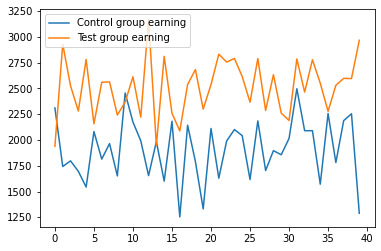

In [124]:
#Earning for two groups by day
x = ab_ctrl.Earning
y = ab_test.Earning

plt.plot(x, alpha=1.0, label='Control group earning')
plt.plot(y, alpha=1.0, label='Test group earning')
plt.legend(loc='upper left')
plt.show()

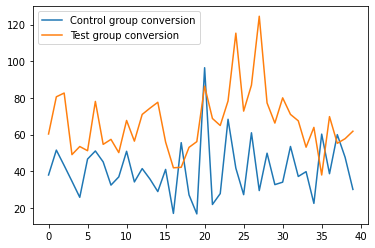

In [125]:
#Conversion for two groups by day
x = ab_ctrl.conversion
y = ab_test.conversion

plt.plot(x, alpha=1.0, label='Control group conversion')
plt.plot(y, alpha=1.0, label='Test group conversion')
plt.legend(loc='upper left')
plt.show()

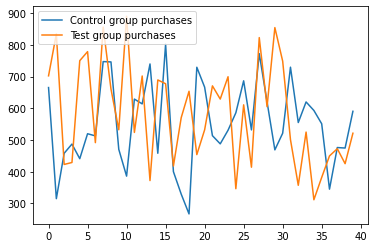

In [129]:
#Clicks for two groups by day
x = ab_ctrl.Purchase
y = ab_test.Purchase

plt.plot(x, alpha=1.0, label='Control group purchases')
plt.plot(y, alpha=1.0, label='Test group purchases')
plt.legend(loc='upper left')
plt.show()

In [126]:
#Funnel chart for control group
fig = px.funnel(ab_ctrl_total[['Impression', 'Click', 'Purchase']])
fig.show()

In [127]:
#Funnel chart for test group
fig = px.funnel(ab_test_total[['Impression', 'Click', 'Purchase']])
fig.show()